In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

C:\Users\Ramesh\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
enc = LabelEncoder()
df['species'] = enc.fit_transform(df['species'])

In [5]:
df.corr()['species']

sepal_length    0.782561
sepal_width    -0.426658
petal_length    0.949035
petal_width     0.956547
species         1.000000
Name: species, dtype: float64

In [6]:
x = df.drop(columns=['sepal_width','species'])
y = df['species']

In [7]:
x.shape

(150, 3)

In [8]:
y.shape

(150,)

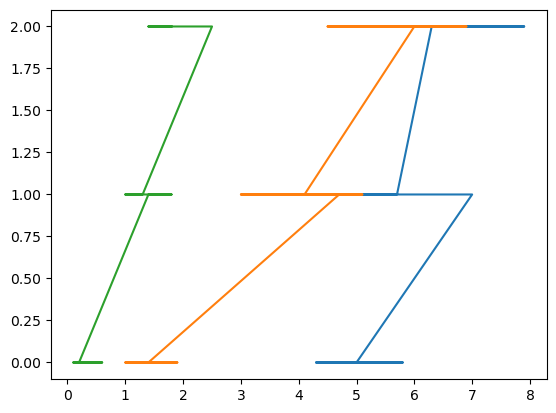

In [9]:
plt.plot(x,y)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.25)

In [11]:
x_train.shape

(112, 3)

In [12]:
x_test.shape

(38, 3)

In [13]:
y_train.shape

(112,)

In [14]:
y_test.shape

(38,)

In [15]:
reg = LinearRegression()

In [16]:
reg.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred = reg.predict(x_test)

In [18]:
y_pred

array([ 2.07637249,  0.9493366 , -0.14777337,  1.82551971, -0.03444166,
        2.30172047, -0.03515725,  1.30750034,  1.26292324,  1.09987771,
        1.60825502,  1.30196373,  1.24200799,  1.31323691,  1.35370857,
       -0.10156514,  1.37000274,  1.2592177 ,  0.0271452 , -0.04734597,
        1.83042496,  1.43804176,  0.1127096 ,  0.03933392,  1.58838292,
       -0.10781734,  0.17338092,  1.16771678,  0.92145356,  0.10554186,
        1.75234399,  1.47206126, -0.06846117,  1.63367561,  2.00402809,
        1.28053285, -0.04109377,  1.59555066])

In [19]:
l2 = list(abs(np.round(y_pred, 0)))
y_pred = [0 if value < 1 else 1 if value < 2 else 2 for value in l2]

In [20]:
result = y_test-y_pred

In [21]:
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

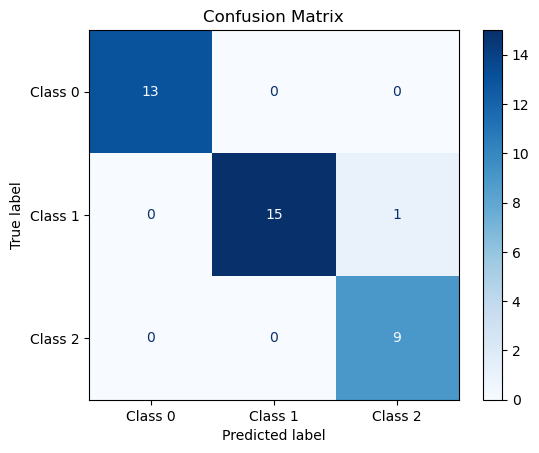

In [22]:
confusion = confusion_matrix(y_test, y_pred)  
disp = ConfusionMatrixDisplay(confusion, display_labels=['Class 0', 'Class 1', 'Class 2'])  
disp.plot(cmap='Blues') 
plt.title("Confusion Matrix")
plt.show()

In [23]:
accuracy_score(y_test, y_pred)

0.9736842105263158